# 数据降维

在统计学和机器学习中，存在所谓“**维数的灾难**”（**the curse of dimensionality**），特别是对于高度非参数的模型，该问题更加严重。

比如，如果我们考虑使用高阶多项式进行拟合：$$y_i=p\left(x_i\right)+u_i$$如果有$K$个解释变量，那么一阶多项式有$K+1$（包含常数项）个参数，而二阶多项式（包含交叉项）就有$C_K^2+K$个参数......随着多项式阶数的增加，未知参数的个数是指数级增加的，然而样本量是有限的，这就会导致模型的过拟合甚至完全拟合的情况。

另一个例子是在匹配（matching）中，如果特征只有一维，那么匹配是非常容易的，然而当维度扩大到比较多维度时，一个样本的周围就很难找到距离近的能够匹配上的样本了。

此外，很多不同类型的数据也会有同样的问题，比如图像数据、文本数据、语音数据等，都会存在数据维度太高的问题。比如，文本数据的特征提取最简单的方法是定义某个句子中是否存在某一个词，然而在每种语言中，词汇数量都非常多，如果我们考虑20000个中文词汇，那么每个句子会被翻译成一个20000维的问题，维数非常之高。

不同的模型解决以上问题的方法有很多，比如在回归分析中使用正则化的方法等。也有一些其他的**降维**（**dimension reduction**）方法可以在模型训练之前预先完成，常见的方法包括主成分分析、流形学习等。我们这一节简要介绍以下降维的常用方法。

# 主成分分析

主成分分析是最简单也是非常常用的数据降维方法。

考虑一组$D$维数据，对于某一个样本$x_i\in \mathbb{R}^D$，我们希望找到一个低维的$m_i\in\mathbb{R}^d,d<D$在尽量不损失信息的条件下代表原始的$D$维数据，与此同时还可以将$m_i$通过某种计算方式还原$y_i\in \mathbb{R}^D$，由于该过程一定有信息损失，所有$y_i\neq x_i$，不过我们可以最小化该损失。

一般的，我们可以找到一个函数$g\left(x\right)$，以及一个函数$h\left(m\right)$，通过$m=g\left(x\right)$计算降维的结果，并使用$y=h\left(m\right)$将其还原。最小化信息损失可以使用距离，比如欧式距离来衡量：$$\min ||y-x||_2=||h\left[ g\left(x\right)\right]-x||_2$$

主成分分析法通过假设$g\left(x\right)$和$h\left(m\right)$都是线性函数来构造这两个映射。我们知道，线性函数都可以通过矩阵来表示，从而假设$g\left(x\right)=U'x$其中$U$是一个$D\times d$的矩阵。在主成分分析中，假设$U$的每一列都是相互正交、长度为1的列向量，那么自然有：$$U'U=I_d$$即单位阵。

如果$U$是一个$D\times D$的正交矩阵，那么自然有$U_{-1}=U'$，从而$U'U=UU'=I_D$，而我们这里$U$是一个$D\times d$的矩阵，不过将$U'x\in \mathbb{R}^d$还原回$\mathbb{R}^D$的自然的矩阵即$$y=UU'x$$

带入到以上目标函数中，我们记$X=\left[x_1',x_2',...,x_N'\right]$为$N\times K$的数据矩阵，我们需要最小化：$$\sum_{i=1}^N ||UU'x_i-x_i||_2^2=\sum_{i=1}^N \left(UU'x_i-x_i\right)'\left(UU'x_i-x_i\right)=trace\left[\left(XUU'-X\right)'\left(XUU'-X\right)\right]$$

可以计算：$$trace\left[\left(XUU'-X\right)'\left(XUU'-X\right)\right]=trace\left[UU'X'XUU'-UU'X'X-X'XUU'+X'X\right] \\ =trace\left[UU'X'XUU'\right]-trace\left[UU'X'X\right]-trace\left[X'XUU'\right]+trace\left[X'X\right] \\ = trace\left[U'X'XUU'U\right]-trace\left[U'X'XU\right]-trace\left[U'X'XU\right]+trace\left[X'X\right] \\ 
=trace\left[U'X'XU\right]-trace\left[U'X'XU\right]-trace\left[U'X'XU\right]+trace\left[X'X\right] \\ = -trace\left[U'X'XU\right]+trace\left[X'X\right] $$

而最后一部分与$U$无关，第一部分实际上就是$Y=XUU'$的每一列的方差之和：$$trace(Y'Y)=trace(UU'X'XUU')=trace(U'X'XUU'U)=trace(U'X'XU)$$所以最小化$x_i$和$y_i$之间的距离，等价于最大化以上的方差之和。

之所以最大化方差，直觉上是因为方差的大小可以看做信息量的多少：方差越大，那么包含在随机变量里面的“信息”越多，比如线性回归中，自变量的方差越大，系数的标准误就会越小，线性回归中的$R^2$也是通过对$y$的方差进行分解而得到的。

一个简单的例子，比如：$x\sim N\left(3,6\right)$，而$y=1+2x+u, u\sim N\left(0,12\right)$这个系统里面有两个随机性的来源：$x$和$u$，我们现在希望找到包含在$x$和$y$里面的信息量最大的组合，如下图所示，方差最大的方向应该是沿着回归线的方向，为了方便展示，我们将以上数据进行标准化：

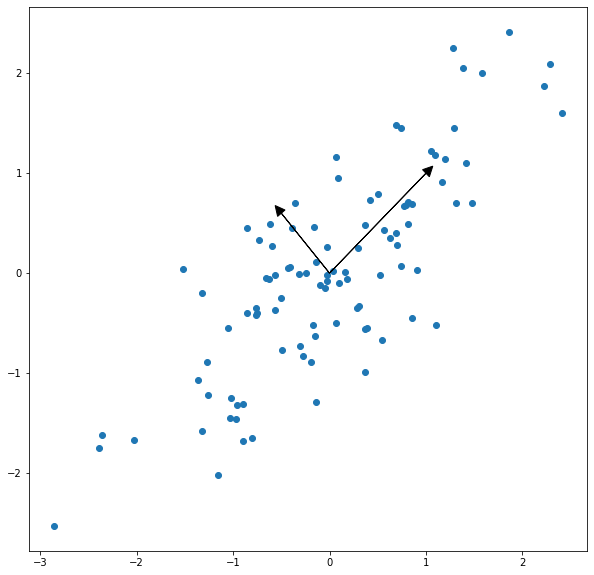

In [3]:
import numpy as np

N=100
x=np.random.normal(3,np.sqrt(6),N)
y=1+2*x+np.random.normal(0,np.sqrt(12),N)
x=(x-x.mean())/x.std()
y=(y-y.mean())/y.std()
# 画图
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
ax = plt.axes()
plt.scatter(x,y)
ax.arrow(0, 0, 1, 1, head_width=0.1, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, -0.5, 0.6, head_width=0.1, head_length=0.1, fc='k', ec='k')
plt.show()

从而对于这个2维的数据，最重要的、方差最大的成分应该是沿着回归直线方向的成分。实际上从这点来看，主成分分析无非是一种坐标变换：将坐标变换为方差最大的方向即是最大的主成分。

为了完成以上的最大化问题，主要到如果假设$X$的每个变量均值为0，那么$\Sigma=X'X$就是$X$的协方差矩阵，从而只需要将$\Sigma$矩阵进行特征值分解：$$\Sigma=\Gamma'\Lambda\Gamma$$由于$\Sigma$是实对称矩阵，所以$\Gamma$可以规范化为一个正交矩阵，而$\Lambda$为对角矩阵，由于$\Sigma$是正定矩阵，所以其特征值一定大于0，我们假设$\Lambda$中的特征值从大到小排列。那么可以构造：$$U=\Gamma_d$$其中$\Gamma_d$为$\Gamma$矩阵的前$d$列。

同时注意到，主成分分析过程中每个变量的方差是非常重要的，所以在进行主成分分析之前，不仅仅要中心化，最好还要对每个变量除以其标准差，即进行标准化。

比如，以上的x,y数据可以使用如下代码计算主成分：

In [37]:
X=np.vstack([x,y]).T
## 标准化
X=(X-X.mean(axis=0))/X.std(axis=0)
## 计算协方差矩阵
Sigma=1/100*X.T@X
print("协方差矩阵=\n",Sigma)
## 计算特征值特征向量
v,vec=np.linalg.eig(Sigma)
print("特征值=\n",v)
print("特征向量=\n",vec)
## 验证特征值分解
vec@np.diag(v)@vec.T
## 计算主成分
U=(vec.T)[:,0]
Comp1=X@U
U2=(vec.T)[:,1]
Comp2=X@U2

协方差矩阵=
 [[1.         0.79843409]
 [0.79843409 1.        ]]
特征值=
 [1.79843409 0.20156591]
特征向量=
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


array([-0.61060218,  0.55625131, -0.75230961, -0.24531267, -0.00763127,
        0.02502098,  0.60761261, -0.35285443, -0.39072423, -0.14600113,
       -0.06495739, -0.22911375,  0.01607643, -0.33434336, -0.26836292,
        0.04407055,  0.15681376,  1.14308141, -0.18261899, -0.17779618,
       -0.44781898,  0.25073043, -0.75410103, -0.20337224,  0.85796561,
        0.21825599, -0.39841192, -0.22244355, -0.03239896,  0.80853976,
       -0.6133918 ,  0.59687587,  0.24789522, -0.29519305,  0.29410908,
        0.44787868,  0.03522568,  0.56686971, -0.52395783, -0.44101166,
       -0.77317237,  0.65587365,  0.13893377,  0.19453207,  0.49618437,
        0.10514611,  0.13356245,  0.00709099, -0.1110866 , -0.55996207,
        0.62261925, -0.29299674, -1.10831526,  0.34080993, -0.79203792,
       -0.11974326,  0.17946012, -0.21816007,  0.11508806,  0.17911019,
        0.47069064,  0.29692566,  0.95465147,  0.55074427, -0.17213484,
        0.19923204,  0.09325022, -0.32188163, -0.24568249,  0.07

或者，也可以直接使用Scikit-learn中的sklearn.decomposition.PCA来进行：

In [40]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X)
# 打印出第一个主成分可解释的总方差的比例，即最大特征值占特征值总和的比例，
print(pca.explained_variance_ratio_)
print(1.79843409/(1.79843409+0.20156591))
# 计算主成分
Comp=pca.transform(X)
# Comp

[0.89921704 0.10078296]
0.899217045


# 多维缩放

**多维缩放**（**multiple dimensional scaling, MDS**）与主成分分析紧密相关的一个方法，不过多维缩放提供了降维方法的另一个视角：**嵌入**（**embedding**）。

所谓嵌入，即从高维空间向低维空间的一个映射，而这个映射需要尽量保持高维空间的距离。比如地图就是现实生活中最常用的嵌入应用。一个城市的路网是三维的，会有高架桥、隧道等等，然而对于我们出行而言，实际上并不需要一个三维地图，我们将路网映射到一张二维的平面地图上，仍然不会损失太多的信息。而且重要的是，在这张地图上，两个点之间的距离是比例于现实世界的距离的。

现在，我们仍然考虑$x_i\in \mathbb{R}^D, i=1,...,N$，以及$N\times D$维的矩阵$X=\left[x_1',x_2',...,x_N'\right]'$。我们可以定义这$N$个点的一个距离矩阵$$D=[d_{ij}]$$其中$d_{ij}$为$x_i$和$x_j$之间的距离。

实际上，除了欧式距离：$$d_{ij}=\sqrt{\left(x_i-x_j\right)'\left(x_i-x_j\right)}$$之外，还有很多其他的距离定义方式，使用不同的距离定义方式会得到不同的结果。一般的，MDS算法寻求找到一个映射$x_i\rightarrow y_i$使得：$$\sum_{i,j=1,...,N}\left[dist\left(x_i,x_j\right)-dist\left(y_i,y_j\right)\right]$$


不过，由于欧式距离可以通过内积定义，分析起来非常方便，我们以欧式距离定义为例。

现在，我们要找到样本在$d$维空间的映射，即将每一个$x_i$找到一个$y_i$的对应，并且使得$$||x_i-x_j||_2\approx ||y_i-y_j||_2$$我们不妨假设$y_i$是中心化的，即假设：$\sum _{i=1}^N y_i=0$，我们可以计算一个$N\times N$的内积矩阵：$$\Omega = Y\times Y'$$其中$Y=\left[y_1',y_2',...,y_N'\right]'$为$N\times d$的矩阵。

可以发现，矩阵$\Omega$的第$i$行第$j$列就是$y_i$和$y_j$的内积，那么$y_i,y_j$之间的距离应该为$$||y_i-y_j||^2_2=\left(y_i-y_j\right)'\left(y_i-y_j\right)'=\Omega_{jj}+\Omega_{ii}-2\Omega_{ij}$$我们要求：$||y_i-y_j||_2\approx ||x_i-x_j||_2$不妨取以上的等号成立，那么我们可以通过$x_i,x_j$之间的距离矩阵$D$反过来计算出$\Omega$矩阵。

当我们计算得到$\Omega$矩阵之后，可以通过特征值分解：$$\Omega=\Gamma'\Lambda\Gamma$$同样该矩阵是一个实对称的正定矩阵，假设所有的特征值从大到小排列，我们选$\Lambda$的前$d$行$d$列为$\Lambda^*$，以及$\Gamma$的前$d$行为$\Gamma^*$，并根据：$$Y=\Gamma^{*'}\Lambda^{*\frac{1}{2}}$$就可以计算嵌入的$Y$了。

虽然出发点不同、计算方法不同，不过如果我们使用了欧氏距离来度量原始数据之间的距离，那么多位缩放和主成分分析实际上是等价的。不过多位缩放技术给我们打开了降维方法的一扇大门：通过嵌入的方法将高维空间映射到低维空间。接下来的流形学习就是在此基础上进行拓展的。

# 流形学习

**流形**（**manifold**）是一个几何学的术语，指的是在局部与欧式空间同胚的空间，即在局部与欧式空间类似的一个空间。比如对于地球而言，虽然是一个球体，但是在一个小的范围内，我们可以把一小块土地看成是一个二维平面，可以使用欧式距离来进行距离测算，而不用复杂的球面距离。

这启发了流形学习，即也许高维空间中的数据并不是真的非常高维，而是有低维的结构，如果我们能够找到这样的结构，在每个局部都看成是一个低维空间，再一块块的将这个高维空间的结构映射到低维空间，那么就完成了降维。

以上思想可以用下图表示：

![](pic/manifold.png "流形学习")

像上图的这种S型曲面，实际上是一个在三维空间中的一个低维空间，我们可以想象是一张纸巾飘在空中：虽然纸巾在空中可以有各种各样的姿态，但是其本质还是一个二维平面。流形学习的目的就是为了将这样的一个三维空间的复杂集合映射到一个低维空间中去。

可以看到，上图中的MDS算法并不能够很好的完成这项任务：MDS试图还原所有的点到点的欧式距离，这就会把三维空间中的形态信息带入到二维空间中去，然而这种形态信息可能是不必要的，所以MDS没能会很好的将额外的维度压缩掉。而我们接下来要讲的Isomap等算法可以很好的完成这个任务。